In [1]:
import pandas as pd

In [2]:
from urllib import parse
from ast import literal_eval
import requests

In [3]:
def get_sise(code, start_time, end_time, time_from='day'):
    get_param = { 'symbol':code, 'requestType':1, 'startTime':start_time, 'endTime':end_time, 'timeframe':time_from }
    get_param = parse.urlencode(get_param)
    url="https://api.finance.naver.com/siseJson.naver?%s"%(get_param)
    response = requests.get(url) 
    return literal_eval(response.text.strip())

In [4]:
data_sec = get_sise('005930', '20160101', '20220228', 'day')

In [5]:
data_sec[0:3]

[['날짜', '시가', '고가', '저가', '종가', '거래량', '외국인소진율'],
 ['20160104', 25200, 25200, 24100, 24100, 306939, 49.35],
 ['20160105', 24040, 24360, 23720, 24160, 216002, 49.34]]

In [6]:
data_df = pd.DataFrame(data_sec, columns=['Date', 'open', 'high', 'low', 'close', 'volume', 'foreigner'])

In [7]:
data_df.dtypes

Date         object
open         object
high         object
low          object
close        object
volume       object
foreigner    object
dtype: object

In [8]:
data_df.drop(data_df.index[0], inplace=True)

In [9]:
data_df.head(3)

,Date,open,high,low,close,volume,foreigner
1,20160104,25200,25200,24100,24100,306939,49.35
2,20160105,24040,24360,23720,24160,216002,49.34
3,20160106,24160,24160,23360,23500,366752,49.32


In [10]:
data_df.drop(data_df.columns[6], axis=1,  inplace=True)

In [11]:
data_df['Date'] = pd.to_datetime(data_df['Date'])

In [12]:
data_df.sort_values(by=['Date'], inplace=True, ascending=False)

In [13]:
data_df.tail(3)

,Date,open,high,low,close,volume
3,2016-01-06,24160,24160,23360,23500,366752
2,2016-01-05,24040,24360,23720,24160,216002
1,2016-01-04,25200,25200,24100,24100,306939


In [14]:
data_df.set_index('Date', drop=True, inplace=True)

In [15]:
data_df.shape

(1513, 5)

In [16]:
data_df.tail(3)

,open,high,low,close,volume
Date,,,,,
2016-01-06,24160,24160,23360,23500,366752
2016-01-05,24040,24360,23720,24160,216002
2016-01-04,25200,25200,24100,24100,306939


In [17]:
data_df.shape

(1513, 5)

In [18]:
no_of_days = data_df.shape[0]

In [19]:
no_of_days

1513

In [20]:
data_df['ma20'] = data_df['close'].rolling(window=20).mean() # 20일 이동평균
data_df['stddev'] = data_df['close'].rolling(window=20).std() # 20일 이동표준편차
data_df['upper'] = data_df['ma20'] + 2*data_df['stddev'] # 상단밴드
data_df['lower'] = data_df['ma20'] - 2*data_df['stddev'] # 하단밴드
data_df = data_df[19:] # 20일 이동평균을 구했기 때문에 20번째 행부터 값이 들어가 있음

In [21]:
data_df

,open,high,low,close,volume,ma20,stddev,upper,lower
Date,,,,,,,,,
2022-01-27,73800,74000,71300,71300,22274777,73550.0,1176.748419,75903.496838,71196.503162
2022-01-26,73900,74400,73100,73300,12976730,73610.0,1128.529551,75867.059102,71352.940898
2022-01-25,74800,75000,73200,74000,17766704,73715.0,1056.446377,75827.892754,71602.107246
2022-01-24,75400,75800,74700,75100,13691134,73895.0,961.618701,75818.237402,71971.762598
2022-01-21,75800,75800,74700,75600,15774888,74025.0,1008.842484,76042.684968,72007.315032
...,...,...,...,...,...,...,...,...,...
2016-01-08,23260,23720,23260,23420,257763,23011.0,289.934657,23590.869314,22431.130686
2016-01-07,23320,23660,23020,23260,282388,23018.0,294.361039,23606.722077,22429.277923
2016-01-06,24160,24160,23360,23500,366752,23047.0,312.226301,23671.452602,22422.547398


In [22]:
import matplotlib.pyplot as plt

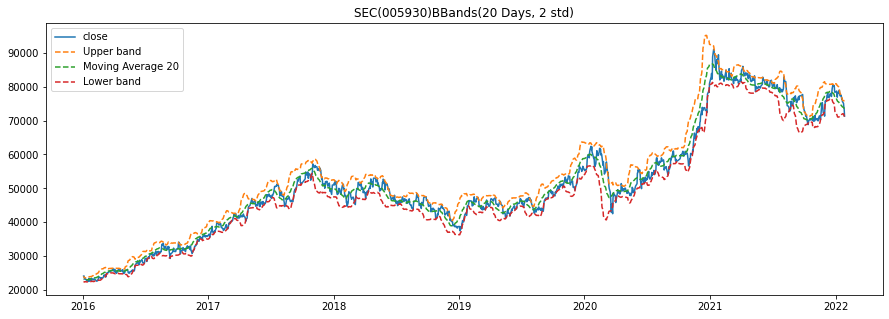

In [23]:
plt.figure(figsize=(15, 5))
plt.plot(data_df.index, data_df['close'], label='close')
plt.plot(data_df.index, data_df['upper'], linestyle='dashed', label='Upper band')
plt.plot(data_df.index, data_df['ma20'], linestyle='dashed', label='Moving Average 20')
plt.plot(data_df.index, data_df['lower'], linestyle='dashed', label='Lower band')
plt.title(f'{"SEC"}(005930)BBands(20 Days, 2 std)')
plt.legend(loc='best');